In [1]:
# import some common libraries
import torch, torchvision
import numpy as np
import pandas as pd
import cv2
import os
import random
import json
from tqdm import tqdm
from matplotlib import pyplot as plt

# import some detectron2 utilities
import detectron2
from detectron2 import model_zoo
from detectron2.config import get_cfg
from detectron2.utils.logger import setup_logger
from detectron2.data import DatasetCatalog, MetadataCatalog
from detectron2.evaluation import COCOEvaluator

# importing custom classes from the repo
from DataLoader import DataLoader
from ImageDisplayer import ImageDisplayer
from CustomVisualiser import CustomVisualizer
from CustomTrainer import CustomTrainer


In [2]:
root_dir = "./../Data" # change this to download to a specific location on your pc
DataLoader().download_datasets(root_dir)
DataLoader().generateAllJsonDataAnnotations(root_dir)


MuscimaPlusPlus_V2 already exists
CVC_Muscima_Augmented already exists
MuscimaPlusPlus_Measure_Annotations already exists
Measure_Bounding_Box_Annotations_v2 already exists
./../Data\CVC_muscima_system_measures.json  already exists!
./../Data\AudioLabs_system_measures.json already exists!
./../Data\CVC_muscima_stave_measures.json  already exists!
./../Data\AudioLabs_stave_measures.json already exists!
./../Data\CVC_muscima_staves.json  already exists!
./../Data\AudioLabs_staves.json already exists!
./../Data\CVC_muscima_system_measures-staves.json  already exists!
./../Data\AudioLabs_system_measures-staves.json already exists!
./../Data\CVC_muscima_system_measures-stave_measures-staves.json  already exists!
./../Data\AudioLabs_system_measures-stave_measures-staves.json already exists!


In [3]:
# to decide which data should be loaded use this:

# type_of_annotation = ["system_measures"]
# type_of_annotation = ["stave_measures"]
# type_of_annotation = ["staves"]

type_of_annotation = ["system_measures", "staves"]
# type_of_annotation = ["system_measures", "stave_measures", "staves"]

json_pathname_extension = "-".join(str(elem) for elem in type_of_annotation)


In [4]:
json_path = os.path.join(root_dir, "CVC_muscima_" + json_pathname_extension + ".json")

muscima_data = DataLoader().load_from_json(json_path)
DataLoader().show_data(muscima_data, type_of_annotation)


{'file_name': './../Data\\CVC_Muscima_Augmented\\CVCMUSCIMA_MultiConditionAligned\\binary\\w-01\\p010.png', 'image_id': 0, 'height': 1710, 'width': 3487, 'annotations': [{'bbox': [215, 1205, 865, 1560], 'bbox_mode': <BoxMode.XYXY_ABS: 0>, 'category_id': 0, 'iscrowd': 0}, {'bbox': [216, 265, 678, 619], 'bbox_mode': <BoxMode.XYXY_ABS: 0>, 'category_id': 0, 'iscrowd': 0}, {'bbox': [693, 265, 963, 619], 'bbox_mode': <BoxMode.XYXY_ABS: 0>, 'category_id': 0, 'iscrowd': 0}, {'bbox': [978, 265, 1320, 619], 'bbox_mode': <BoxMode.XYXY_ABS: 0>, 'category_id': 0, 'iscrowd': 0}, {'bbox': [1334, 265, 1727, 619], 'bbox_mode': <BoxMode.XYXY_ABS: 0>, 'category_id': 0, 'iscrowd': 0}, {'bbox': [1736, 265, 2193, 619], 'bbox_mode': <BoxMode.XYXY_ABS: 0>, 'category_id': 0, 'iscrowd': 0}, {'bbox': [2203, 265, 2835, 619], 'bbox_mode': <BoxMode.XYXY_ABS: 0>, 'category_id': 0, 'iscrowd': 0}, {'bbox': [2846, 265, 3344, 619], 'bbox_mode': <BoxMode.XYXY_ABS: 0>, 'category_id': 0, 'iscrowd': 0}, {'bbox': [215, 734,

In [5]:
json_path = os.path.join(root_dir, "AudioLabs_" + json_pathname_extension + ".json")

audioLabs_data = DataLoader().load_from_json(json_path)
DataLoader().show_data(audioLabs_data, type_of_annotation)


{'file_name': './../Data\\Measure_Bounding_Box_Annotations_v2\\Beethoven_Op026-01\\img\\Beethoven_Op026-01_000.png', 'image_id': 0, 'height': 1057, 'width': 751, 'annotations': [{'bbox': [77, 232, 188, 334], 'bbox_mode': <BoxMode.XYXY_ABS: 0>, 'category_id': 0, 'iscrowd': 0}, {'bbox': [189, 232, 268, 334], 'bbox_mode': <BoxMode.XYXY_ABS: 0>, 'category_id': 0, 'iscrowd': 0}, {'bbox': [271, 232, 394, 334], 'bbox_mode': <BoxMode.XYXY_ABS: 0>, 'category_id': 0, 'iscrowd': 0}, {'bbox': [396, 232, 480, 334], 'bbox_mode': <BoxMode.XYXY_ABS: 0>, 'category_id': 0, 'iscrowd': 0}, {'bbox': [482, 232, 619, 334], 'bbox_mode': <BoxMode.XYXY_ABS: 0>, 'category_id': 0, 'iscrowd': 0}, {'bbox': [621, 232, 702, 334], 'bbox_mode': <BoxMode.XYXY_ABS: 0>, 'category_id': 0, 'iscrowd': 0}, {'bbox': [28, 393, 159, 492], 'bbox_mode': <BoxMode.XYXY_ABS: 0>, 'category_id': 0, 'iscrowd': 0}, {'bbox': [161, 393, 230, 492], 'bbox_mode': <BoxMode.XYXY_ABS: 0>, 'category_id': 0, 'iscrowd': 0}, {'bbox': [232, 393, 328,

In [6]:
def registerDataset(data_name, d, data, classes):
    DatasetCatalog.register(data_name, lambda d=d: data)
    MetadataCatalog.get(data_name).set(thing_classes=classes)

    return MetadataCatalog.get(data_name)
    
muscima_metadata = registerDataset("muscima", "muscima", muscima_data, type_of_annotation)
audioLabs_metadata = registerDataset("audioLabs", "audioLabs", audioLabs_data, type_of_annotation)


./../Data\CVC_Muscima_Augmented\CVCMUSCIMA_MultiConditionAligned\binary\w-26\p004.png


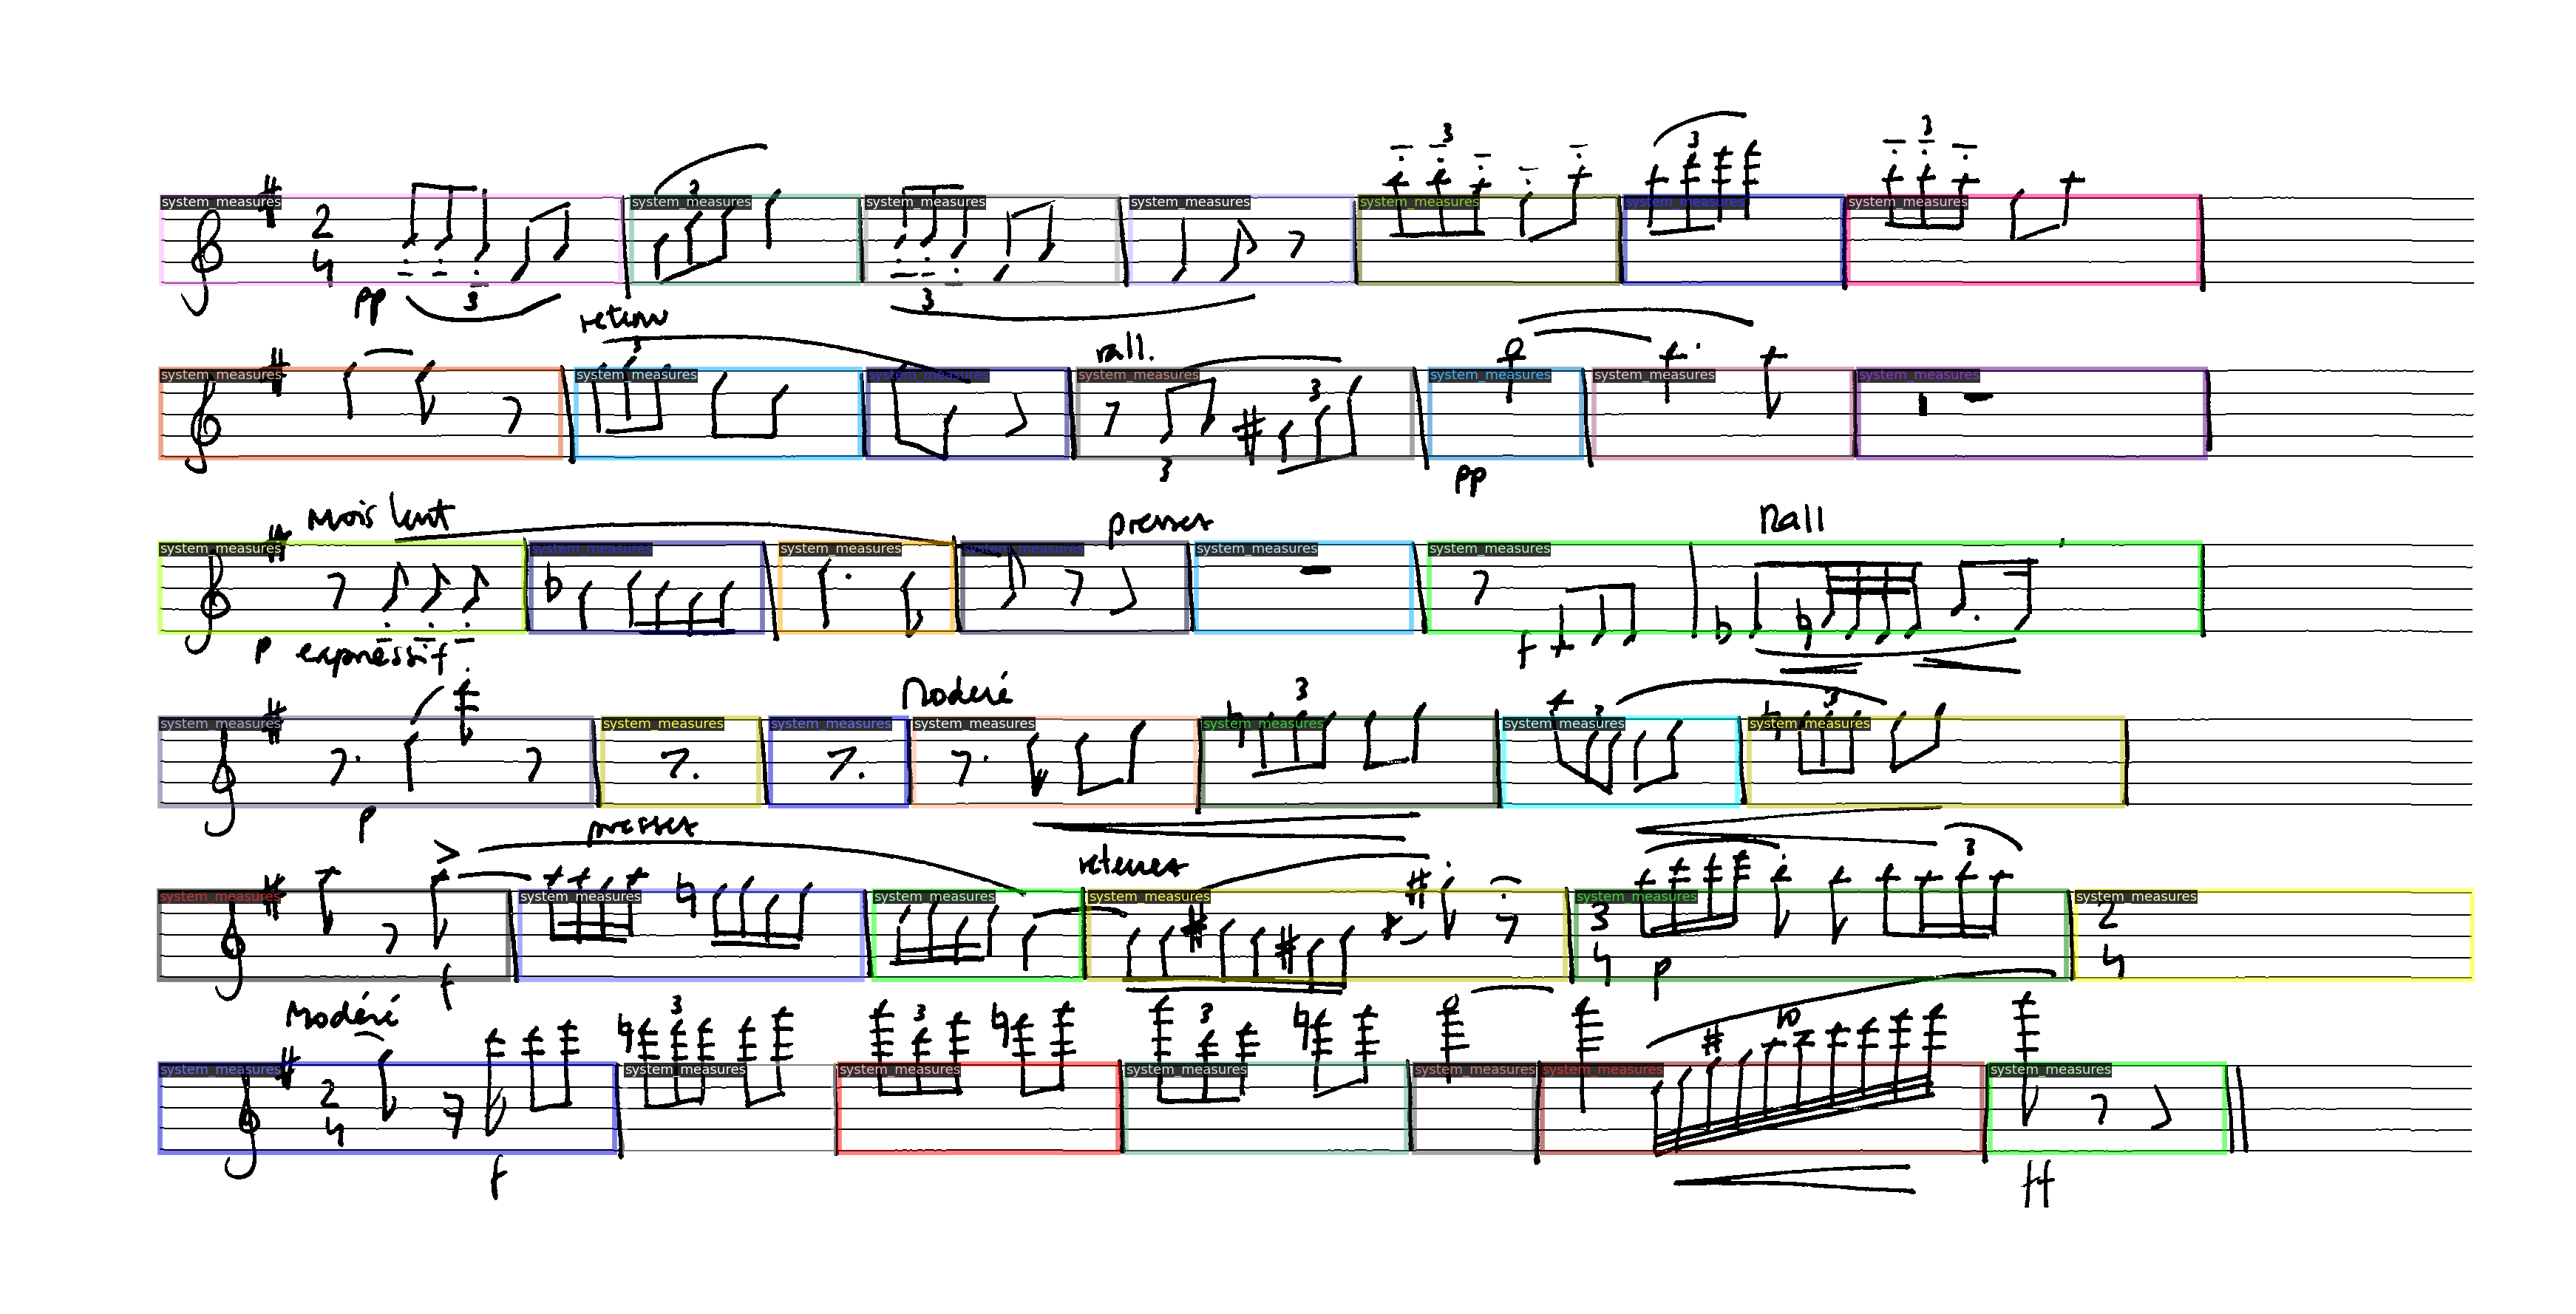

./../Data\CVC_Muscima_Augmented\CVCMUSCIMA_MultiConditionAligned\grayscale\w-49\p009.png


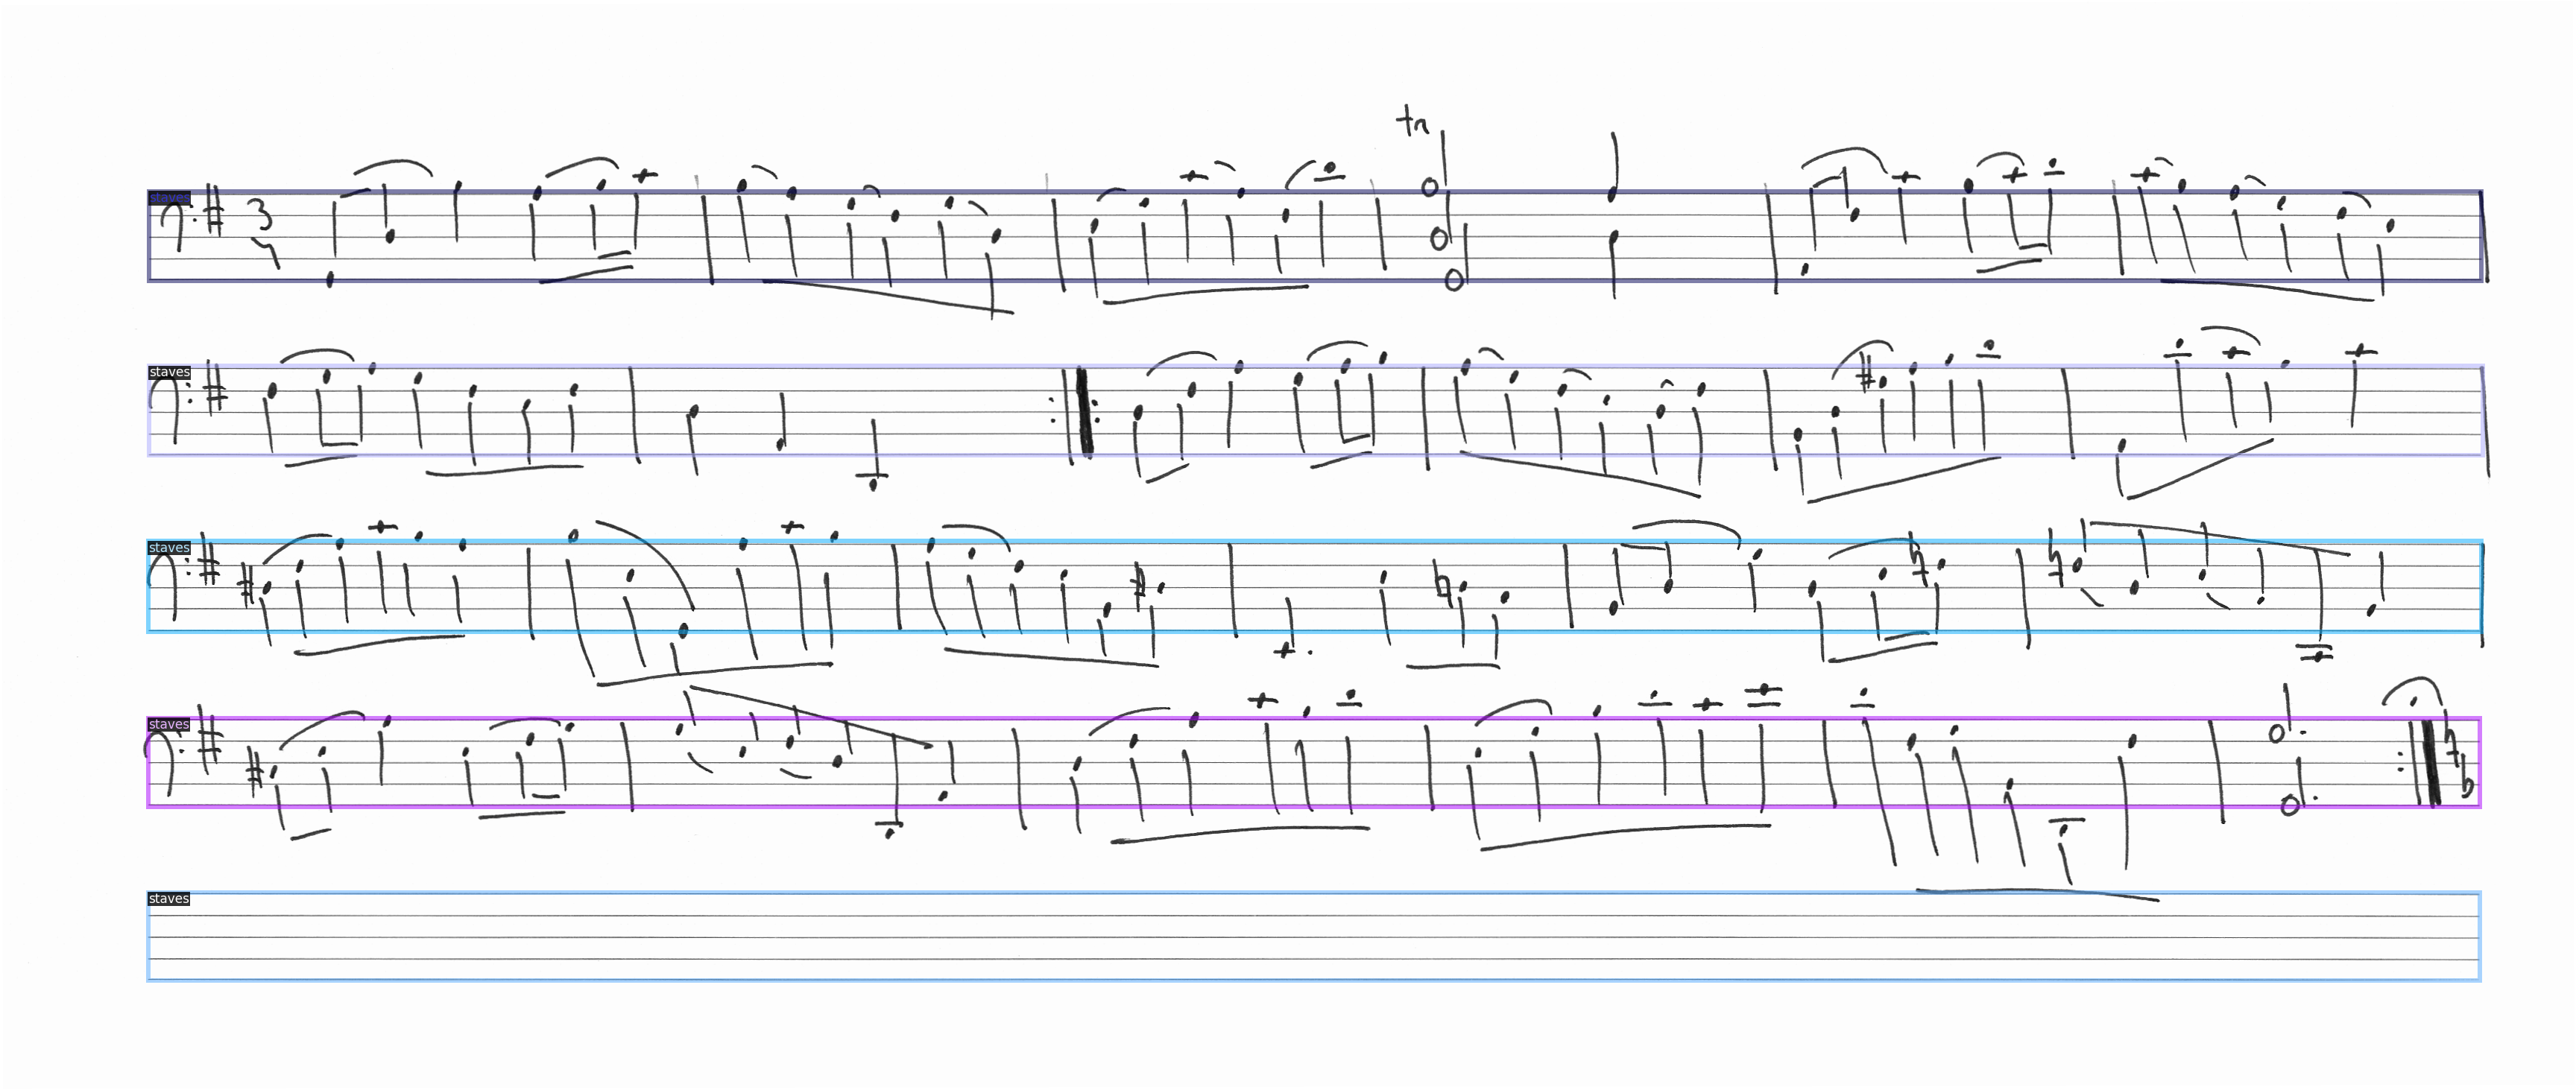

In [7]:
ImageDisplayer().displayRandomSampleData(muscima_data, muscima_metadata, 1, [type_of_annotation.index("system_measures")])
ImageDisplayer().displayRandomSampleData(muscima_data, muscima_metadata, 1, [type_of_annotation.index("staves")])


./../Data\Measure_Bounding_Box_Annotations_v2\Wagner_WWV086D-1\img\Wagner_WWV086D_086.png


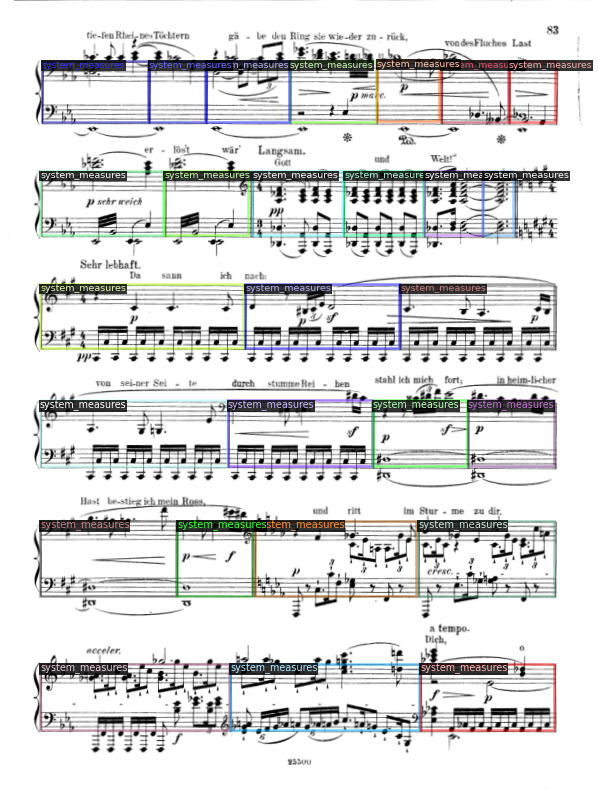

./../Data\Measure_Bounding_Box_Annotations_v2\Wagner_WWV086B-1\img\Wagner_WWV086B_026.png


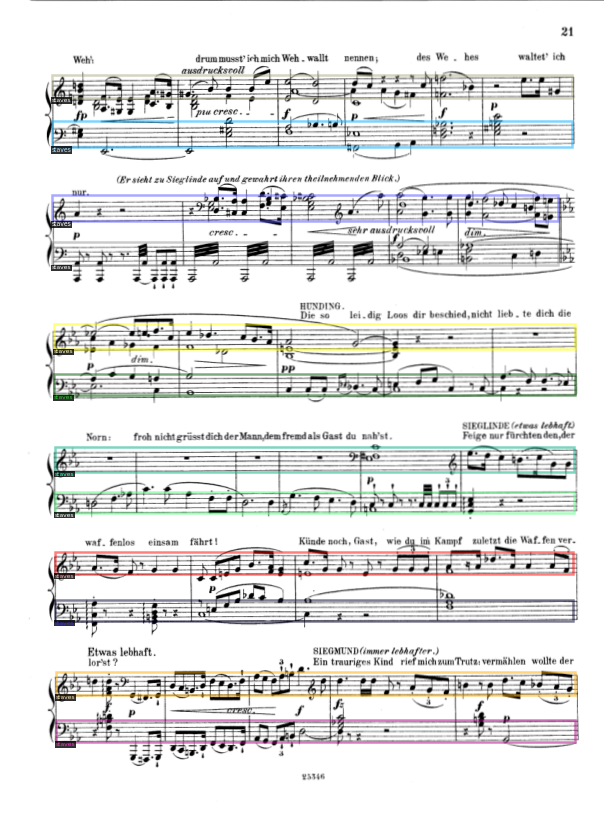

In [8]:
ImageDisplayer().displayRandomSampleData(audioLabs_data, audioLabs_metadata, 1, [type_of_annotation.index("system_measures")])
ImageDisplayer().displayRandomSampleData(audioLabs_data, audioLabs_metadata, 1, [type_of_annotation.index("staves")])


In [9]:
from sklearn.model_selection import train_test_split

musicma_train_data, test_val_data = train_test_split(muscima_data, test_size=0.4, random_state=1)
musicma_test_data, musicma_val_data = train_test_split(test_val_data, test_size=0.5, random_state=1)

audiolabs_train_data, test_val_data = train_test_split(audioLabs_data, test_size=0.4, random_state=1)
audiolabs_test_data, audiolabs_val_data = train_test_split(test_val_data, test_size=0.5, random_state=1)

train_data = musicma_train_data + audiolabs_train_data
test_data = musicma_test_data + audiolabs_test_data
val_data = musicma_val_data + audiolabs_val_data

train_data_name = "train"
metadata = registerDataset(train_data_name, train_data_name, train_data, type_of_annotation)

test_data_name = "test"
registerDataset(test_data_name, test_data_name, test_data, type_of_annotation)

val_data_name = "val"
registerDataset(val_data_name, val_data_name, val_data, type_of_annotation)


namespace(name='val', thing_classes=['system_measures', 'staves'])

In [10]:
def setup_cfg(train_data_name, test_data_name, val_period, max_iter, num_classes, model_output_dir, cfg_file, existing_model_weight_path=None):
    cfg = get_cfg()
    cfg.merge_from_file(model_zoo.get_config_file(cfg_file))

    if not os.path.exists(model_output_dir):
        os.mkdir(model_output_dir)
    cfg.OUTPUT_DIR = model_output_dir

    setup_logger(model_output_dir)

    cfg.DATASETS.TRAIN = (train_data_name,)
    cfg.DATASETS.TEST = (test_data_name,)

    cfg.DATALOADER.NUM_WORKERS = 4 # Number of data loading threads

    if existing_model_weight_path:
        cfg.MODEL.WEIGHTS = existing_model_weight_path
        continue_training = True
    else:
        cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url(cfg_file)  # Let training initialize from model zoo
        continue_training = False

    cfg.TEST.EVAL_PERIOD = val_period

    # Number of images per batch across all machines.
    # If we have 16 GPUs and IMS_PER_BATCH = 32,
    # each GPU will see 2 images per batch.
    cfg.SOLVER.IMS_PER_BATCH = 4 # 1 GPU - 4 images per batch
    cfg.SOLVER.BASE_LR = 0.005  # pick a good LR
    cfg.SOLVER.MAX_ITER = max_iter
    cfg.SOLVER.CHECKPOINT_PERIOD = val_period # Save a checkpoint after every this number of iterations
    cfg.SOLVER.GAMMA = 0.8
    cfg.SOLVER.WARMUP_ITERS = 1200

    # to decrease the learning rate at set iterations, use this code here
    # manually
    # steps = (3300, 4500, 6000, 7800, 9900, 12300, 15000, 18000)
    # or with a bit of extra code in a loop
    # steps = ()
    # for i in range(cfg.SOLVER.WARMUP_ITERS * 2, val_period * 100, val_period * 3): # decrease lr every steps iteration (every 3 "epochs")
    #     steps = steps + (i, )
    # cfg.SOLVER.STEPS = steps

    cfg.SOLVER.STEPS = ()

    cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 512 # 128 faster, and good enough for toy dataset (default: 512)
    cfg.MODEL.ROI_HEADS.NUM_CLASSES = num_classes
    cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.2  # set the testing threshold for this model. Model should be at least 20% confident detection is correct
    cfg.MODEL.RETINANET.SCORE_THRESH_TEST = 0.2

    # Set seed to negative to fully randomize everything.
    # Set seed to positive to use a fixed seed. Note that a fixed seed increases
    # reproducibility but does not guarantee fully deterministic behavior.
    # Disabling all parallelism further increases reproducibility.
    cfg.SEED = 1

    return cfg, continue_training


In [11]:
max_iter = 20000
model_output_dir = os.path.join(root_dir, "models/R_101_FPN_3x-system_measures-staves")
# cfg_file = "COCO-Detection/faster_rcnn_X_101_32x8d_FPN_3x.yaml" # slowest training, but best AP
cfg_file = "COCO-Detection/faster_rcnn_R_101_FPN_3x.yaml" # faster training, but slightly less AP, way smaller model (.pth) file

# val_period has to be dividable by 20 - see: https://github.com/facebookresearch/detectron2/issues/1714
# because the PeriodicWriter hook defaults to logging every 20 iterations in https://github.com/facebookresearch/detectron2/blob/439134dd6fe7c7aa0df4571d27a6386c1678551f/detectron2/engine/hooks.py
# if it is not dividable by 20, the custom variables in the storage will not be logged in the metrics.json file
val_period = 300

# if you already trained a model - link to its path with path
weight_file = "final_system_measure_model.pth"
path_to_weight_file = os.path.join(model_output_dir, weight_file) 

cfg, continue_training = setup_cfg(train_data_name, test_data_name, val_period, max_iter, len(type_of_annotation), model_output_dir, cfg_file)
# cfg, continue_training = setup_cfg(train_data_name, test_data_name, val_period, max_iter, len(type_of_annotation), model_output_dir, cfg_file, path_to_weight_file) # to continue training from weight file


In [12]:
# generate the coco annotations for the evaluator before the evaluator hook
COCOEvaluator(test_data_name, cfg, False, output_dir=cfg.OUTPUT_DIR) 
COCOEvaluator(val_data_name, cfg, False, output_dir=cfg.OUTPUT_DIR)


[08/11 16:00:00 d2.evaluation.coco_evaluation]: 'test' is not registered by `register_coco_instances`. Therefore trying to convert it to COCO format ...
WARNING [08/11 16:00:00 d2.data.datasets.coco]: Using previously cached COCO format annotations at './../Data\models/R_101_FPN_3x-system_measures-staves\test_coco_format.json'. You need to clear the cache file if your dataset has been modified.
[08/11 16:00:01 d2.evaluation.coco_evaluation]: 'val' is not registered by `register_coco_instances`. Therefore trying to convert it to COCO format ...
WARNING [08/11 16:00:01 d2.data.datasets.coco]: Using previously cached COCO format annotations at './../Data\models/R_101_FPN_3x-system_measures-staves\val_coco_format.json'. You need to clear the cache file if your dataset has been modified.


In [15]:
trainer = CustomTrainer(cfg, val_data_name, val_period)
trainer.resume_or_load(resume=continue_training)


bias=False
            (norm): FrozenBatchNorm2d(num_features=128, eps=1e-05)
          )
          (conv2): Conv2d(
            128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False
            (norm): FrozenBatchNorm2d(num_features=128, eps=1e-05)
          )
          (conv3): Conv2d(
            128, 512, kernel_size=(1, 1), stride=(1, 1), bias=False
            (norm): FrozenBatchNorm2d(num_features=512, eps=1e-05)
          )
        )
        (1): BottleneckBlock(
          (conv1): Conv2d(
            512, 128, kernel_size=(1, 1), stride=(1, 1), bias=False
            (norm): FrozenBatchNorm2d(num_features=128, eps=1e-05)
          )
          (conv2): Conv2d(
            128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False
            (norm): FrozenBatchNorm2d(num_features=128, eps=1e-05)
          )
          (conv3): Conv2d(
            128, 512, kernel_size=(1, 1), stride=(1, 1), bias=False
            (norm): FrozenBatchNorm2d(num_featu

NameError: name 'math' is not defined